# LR StandardScaler Grid model

#### 1. 준비

In [1]:
# 관련 라이브러리 및 모듈 Import
# import
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import SGDRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
def evaluate_score(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f'mse- {mse:.3f}')
    print(f'rmse- {rmse:.3f}')
    print(f'r2- {r2:.3f}')
    
    return

### 데이터 수집, 탐색, 준비

####  데이터셋에 대한 설명 및 정보 확인

In [4]:
# 데이터 csv 불러오기
train = pd.read_csv('./train5.csv')

In [5]:
# X(독립변수), Y(종속변수) 분할
X = train.drop('match', axis=1)
y = train['match']
# 학습용 데이터와 평가용 데이터로 분할하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 규제가 없는 선형 모델

In [6]:
# 파이프라인 정의
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
])

# 탐색할 하이퍼파라미터 값 지정
param_grid = {}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# 모델 학습
grid_search.fit(X_train, y_train)

# 최적의 모델 선택
best_model = grid_search.best_estimator_

# 최적의 하이퍼파라미터 출력
print("Best Parameters: ", grid_search.best_params_)

# 모델 평가
y_pred = best_model.predict(X_test)
y_pred[y_pred < 0] = 0.

evaluate_score(y_test, y_pred)

Best Parameters:  {}
mse- 459.932
rmse- 21.446
r2- 0.192


In [7]:
# 회귀 계수 확인
LR_coef = pd.Series(best_model.named_steps['linear_regression'].coef_, index=X.columns)
LR_coef

gender        1.554928
attr_s        0.496621
sinc_s        0.512299
intel_s       0.492426
fun_s         1.169311
amb_s         0.872621
attr_eval     4.307021
sinc_eval     0.645193
intel_eval   -0.232577
fun_eval     -0.809025
amb_eval      0.372556
shar_eval     4.892136
like_eval     1.733372
dtype: float64

### 계수 시각화

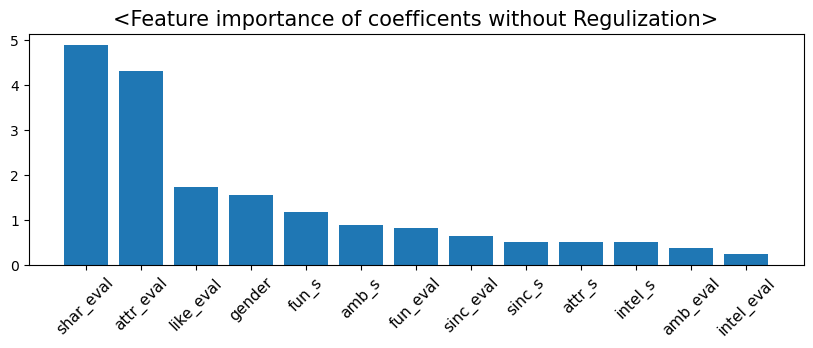

In [8]:
coef = np.abs(LR_coef)
coef = pd.Series(coef, index=X.columns).sort_values(ascending=False)
coef
# 시각화
plt.figure(figsize=(10,3))
plt.title('<Feature importance of coefficents without Regulization>', fontsize=15)
plt.bar(coef.index, coef.values)
plt.xticks(coef.index, rotation=45, fontsize=11);

##### 독립변수가 여러 개일 때 모델의 성능을 시각화하려면 실제값과 예측값의 분포 차이를 그린다.
- 실제값과 예측값이 같을수록 x,y가 같은 곳을 찍어서 y = x 그래프를 그리게 될 것이다.

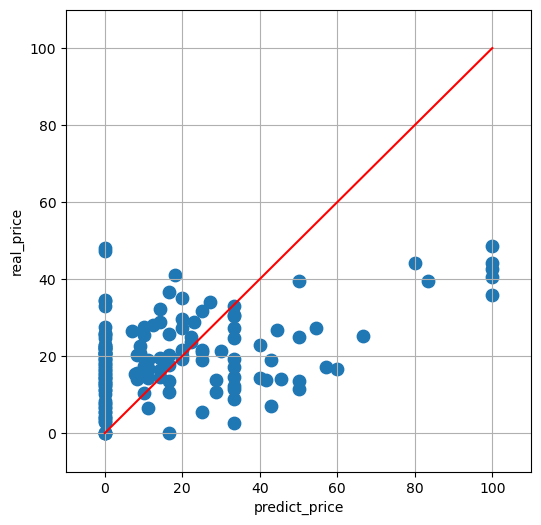

In [9]:
plt.figure(figsize = (6,6))
plt.scatter(y_test,y_pred,s = 80)
plt.grid()
plt.ylabel('real_price')
plt.xlabel('predict_price')
plt.xlim([-10, 110])
plt.ylim([-10, 110])
plt.plot([0,100],[0,100],c = 'r')
plt.show()

### 변수 간의 상관관계를 히트맵으로 시각화 및 탐색

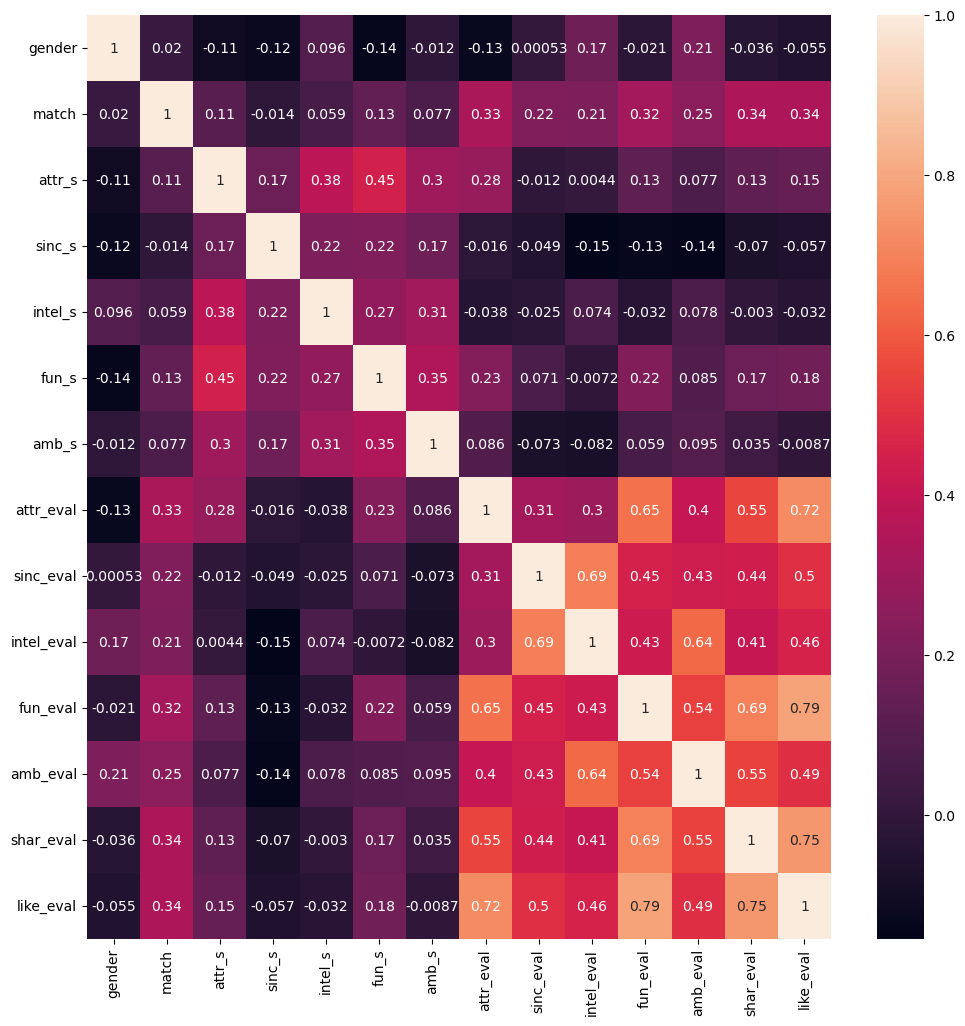

In [10]:
# 상관계수를 구하여 저장
corr_df = train.corr()
corr_df.corr()

# 상관계수를 히트맵으로 시각화
import seaborn as sns
plt.figure(figsize = (12,12))
sns.heatmap(corr_df, annot=True);

### 예측값

In [11]:
y_pred

array([16.91328829, 13.65951288, 15.25258559, 32.97732437, 17.46049318,
       40.41271005, 19.0074538 , 20.25765436, 39.59663925, 27.50856009,
        5.41931955, 10.44056586, 32.30188854, 20.6774392 , 20.23138697,
        6.94036586,  0.        , 26.65038244, 24.98968869, 10.65487663,
       16.57961726, 48.61927519, 28.91956375,  8.81055159, 19.285427  ,
       21.29067979, 48.07616184, 15.34467309, 21.99563495, 20.85216002,
       11.36711644, 40.94056965, 30.42689869, 21.08969696, 22.70122675,
        5.57825109, 10.61662501, 28.9373351 , 23.54460151,  7.90609078,
       30.76064722,  6.55720619,  7.66241552, 25.65627083, 28.05103284,
       14.00841897,  3.93295721, 19.05007212, 22.39938286, 29.56079222,
       16.36046722, 22.92001968, 16.88782596, 27.32002363,  2.80316177,
       20.15329573, 14.24089339, 17.11789095, 19.19307103,  0.        ,
       18.86798521, 16.56015763, 13.64301703, 14.27269548, 26.11224049,
       34.09895756, 25.4139358 , 10.14926418, 33.06653863, 19.23